In [1]:
%matplotlib inline
from ENet import enet, train_utils, train
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.utils import to_categorical
from keras import callbacks
import numpy as np
import os

Using TensorFlow backend.


In [2]:
model, name = enet.autoencoder(2, (256,256))

(TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(64)]), TensorShape([Dimension(None), Dimension(128), Dimension(128), Dimension(16)]), TensorShape([Dimension(None), Dimension(128), Dimension(128), Dimension(16)]), 64)
(TensorShape([Dimension(None), Dimension(64), Dimension(16), Dimension(64)]), 'pad', (0, 48))
(TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(128)]), TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(64)]), TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(64)]), 128)
(TensorShape([Dimension(None), Dimension(32), Dimension(64), Dimension(32)]), 'pad', (0, 64))
bottleneck 2.x and 3.x   
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 256, 256, 3)   0                                            
_____

In [21]:
weights_path = '../logs4/FINAL_weights_0.80.hdf5'
model.load_weights(weights_path)

In [3]:
# given the output of the model, we want to produce a mask to reapply to another image
def output_to_mask(output, shape=(256,256), threshold=.5):
    yval = [1 if l[1] >= threshold else 0 for l in output]
    ymask = np.reshape(yval,(256,256))
    return ymask.astype(bool)

def reverse_mask(output, shape=(256,256), threshold=.5):
    yval = [0 if l[1] >= threshold else 1 for l in output]
    ymask = np.reshape(yval,(256,256))
    return ymask.astype(bool)

In [4]:
severity_prefix = '../Severities_Final/'
severity_cropped = '../Severity_cropped/'
reverse_cropped = '../Reverse_crop/'

cbb_files = ['cbb-levels/cbb_2/',
            'cbb-levels/cbb_3/',
            'cbb-levels/cbb_4/',
            'cbb-levels/cbb_5/']

cgm_files = ['cgm-levels/cgm_2/',
            'cgm-levels/cgm_3/',
            'cgm-levels/cgm_4/',
            'cgm-levels/cgm_5/']


cmd_files = ['cmd-levels/cmd_2/',
            'cmd-levels/cmd_3/',
            'cmd-levels/cmd_4/',
            'cmd-levels/cmd_5/']


cbsd_files = ['cbsd-levels/cbsd_2/',
             'cbsd-levels/cbsd_3/',
             'cbsd-levels/cbsd_4/',
             'cbsd-levels/cbsd_5/']


healthy_images = ['healthy_1/']

all_images = [cbb_files, cgm_files, cmd_files, healthy_images]

In [5]:
# MAKE NEW DIRECTORY TO MIRROR CURRENT

for file_set in all_images:
    for directory in file_set:
        dir_name = os.path.join(reverse_cropped, directory)
        os.makedirs(dir_name)

In [6]:
def full_image_generator():
    for file_set in all_images:
        for directory in file_set:
            full_image_dir = os.path.join(severity_prefix, directory)
            for image_path in os.listdir(full_image_dir):
                if '.DS_Store' in image_path: continue
                yield os.path.join(full_image_dir, image_path)

In [7]:
def crop_output_image(model, image_path):
    t_array = np.array([train_utils.get_training_image(image_path, (256,256))])
    output = model.predict(t_array)
    ymask = output_to_mask(output[0], threshold=.5)
    return array_to_img(train_utils.extract_leaf(t_array[0], ymask))

In [8]:
def crop_and_store(cropper_dir=severity_cropped):
    for full_path in full_image_generator():
        cropped_path = '/'.join(full_path.split('/')[-3:])
        storage_path = os.path.join(cropper_dir, cropped_path)
        print 'storing image at:', storage_path
        output_img = crop_output_image(model, full_path)
        output_img.save(storage_path)
    return True

In [9]:
crop_and_store(reverse_cropped)

storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141212_084710.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141212_102950.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141212_101849.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141211_090435.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141211_090434.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141212_165100.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141211_151718.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141211_151650.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141212_124000.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141210_104013.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141210_103959.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141210_112459.jpg
storing image at: ../Reverse_crop/cbb-levels/cbb_2/IMG_20141214_114900.jpg
storing image at: ../Reve

IOError: image file is truncated (28 bytes not processed)

In [13]:
tarr = np.array([train_utils.get_training_image(unseen_file, (256,256))])

In [14]:
output = model.predict(tarr)

In [15]:
ymask = output_to_mask(output[0], threshold=.5)
# ymask = train_utils.smooth_mask(ymask, threshold=.1, self_weight=.01, size=11)

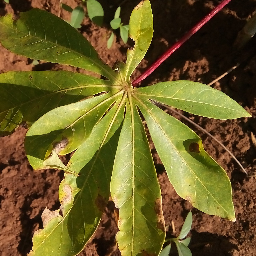

In [16]:
array_to_img(tarr[0])

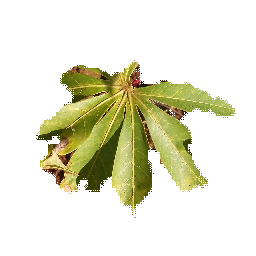

In [17]:
array_to_img(train_utils.extract_leaf(tarr[0], ymask))